# 第８章:ニューラルネット  
第6章で取り組んだニュース記事のカテゴリ分類を題材として，ニューラルネットワークでカテゴリ分類モデルを実装する．なお，この章ではPyTorch, TensorFlow, Chainerなどの機械学習プラットフォームを活用せよ

### 70.単語ベクトルの和による特徴量  
問題50で構築した学習データ，検証データ，評価データを行列・ベクトルに変換したい．例えば，学習データについて，すべての事例xi
の特徴ベクトルxi
を並べた行列X
と，正解ラベルを並べた行列（ベクトル）Y
を作成したい．  
$$ X = \begin{pmatrix}\textbf{x}_1 \\ \textbf{x}_2 \\ \vdots \\ \textbf{x}_n \end{pmatrix} \in \mathbb{R}^{n\times d} , Y = \begin{pmatrix}\textbf{y}_1\\ \textbf{y}_2 \\ \vdots \\ \textbf{y}_n \end{pmatrix} \in \mathbb{N}^n$$  
ここで，n
は学習データの事例数であり，xi∈ℝd
とyi∈ℕ
はそれぞれ，i∈{1,…,n}
番目の事例の特徴量ベクトルと正解ラベルを表す． なお，今回は「ビジネス」「科学技術」「エンターテイメント」「健康」の4カテゴリ分類である．ℕ<4
で4
未満の自然数（0
を含む）を表すことにすれば，任意の事例の正解ラベルyi
はyi∈ℕ<4
で表現できる． 以降では，ラベルの種類数をL
で表す（今回の分類タスクではL=4
である）

i番目の事例の特徴ベクトル$x_i$は，次式で求める.  

$$ \textbf{x}_i = \frac{1}{T_i} \sum_{t=1}^{T_i} emb(w_{i,t}) $$

ここで，i
番目の事例はTi
個の（記事見出しの）単語列($w_{i,1},w_{i,2},\dots ,w_{i,T_i}$)
から構成され，emb(w)∈ℝd
は単語w
に対応する単語ベクトル（次元数はd
）である．すなわち，i
番目の事例の記事見出しを，その見出しに含まれる単語のベクトルの平均で表現したものがxi
である．今回は単語ベクトルとして，問題60でダウンロードしたものを用いればよい．300
次元の単語ベクトルを用いたので，d=300
である．  
i番目の事例のラベル$y_i$は，次のように定義する．

$$\begin{equation}
  y_i =
  \begin{cases}
    0  & \text{(記事$x_i$がビジネスカテゴリの場合)} \\
    1                & \text{(記事$x_i$が科学技術カテゴリの場合)} \\
    2       & \text{(記事$x_i$がエンタメカテゴリの場合)} \\
    3 & \text{(記事$x_i$が健康カテゴリの場合)}
  \end{cases}
\end{equation}$$

なお，カテゴリ名とラベルの番号が一対一で対応付いていれば，上式の通りの対応付けでなくてもよい．  
以上の仕様に基づき，以下の行列・ベクトルを作成し，ファjイルに保存せよ．

・学習データの特徴量行列：$X_{train}\in \mathbb{R}^{N_t \times d}$  
・学習データのラベルベクトル:$Y_{train}\in \mathbb{N}^{N_t}$  
・検証データの特徴量行列:$X_{valid}\in\mathbb{R}^{N_v\times d}$  
・検証データのラベルベクトル:$Y_{valid}\in\mathbb{N}^{N_v}$  
・評価データの特徴量行列:$X_{test}\in\mathbb{R}^{N_e\times d}$  
・評価データのラベルベクトル:$Y_{test}\in\mathbb{N}^{N_e}$

なお，$N_t,N_v,N_e$はそれぞれ，学習データの事例数，検証データの事例数，評価データの事例数である．

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import japanize_matplotlib

train = pd.read_csv('./ss6/csv/train.csv', sep='\t')
valid = pd.read_csv('./ss6/csv/valid.csv', sep='\t')
test = pd.read_csv('./ss6/csv/test.csv', sep='\t')
df = pd.concat([train, valid, test], axis=0)
df.head()

,TITLE,PUBLISHER,CATEGORY
0,L'wren Scott - L'Wren Scott's housekeeper reve...,Contactmusic.com,e
1,Australia Set to Fund Second Clean-Energy Proj...,Businessweek,b
2,Google Brings Android to Smartwatches in Mobil...,Businessweek,t
3,Tina Fey - Tina Fey Dispels Mean Girls Sequel ...,Contactmusic.com,e
4,Rick Rubin - Rick Rubin Takes An Ice Bath For ...,Contactmusic.com,e


In [10]:
with open('./ss7/gensim-GoogleNews-vec.pkl', mode='rb') as fp:
    model = pickle.load(fp)

In [15]:
import string
import torch
import re

def text2vec(text):
    table = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #記号を等長の半角スペースで変換する変換表の作成
    text = text.translate(table)
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    word_list = text.split()
    vec = [model[word] for word in word_list if word in model]
    return torch.tensor(sum(vec)/len(vec))

In [17]:
#torch.stackで行列の新次元としてベクトルを結合できる
X_train = torch.stack([text2vec(text) for text in train['TITLE']])
X_valid = torch.stack([text2vec(text) for text in valid['TITLE']])
X_test = torch.stack([text2vec(text) for text in test['TITLE']])

In [18]:
X_train.size(), X_train

(torch.Size([10672, 300]),
 tensor([[-0.0200,  0.1468, -0.1442,  ..., -0.0660,  0.0160,  0.1448],
         [-0.0325,  0.0205,  0.0668,  ..., -0.0393,  0.0037, -0.0476],
         [ 0.0546, -0.0825, -0.0760,  ..., -0.0602,  0.0048, -0.0069],
         ...,
         [-0.0367,  0.0171, -0.0423,  ..., -0.0434,  0.0469,  0.0620],
         [ 0.0225,  0.0613,  0.0038,  ..., -0.0829, -0.0349, -0.0185],
         [-0.0289,  0.0737, -0.0573,  ..., -0.0636,  0.0144,  0.1008]]))

まず特徴量行列を作成した．サイズを確認すると使用したword2vecは300次元なので事例数×次元となっている．

In [19]:
category_ref = {'b':0, 't':1, 'e':2, 'm':3}
y_train = torch.tensor(train['CATEGORY'].map(lambda x:category_ref[x]).values)
y_valid = torch.tensor(valid['CATEGORY'].map(lambda x:category_ref[x]).values)
y_test = torch.tensor(test['CATEGORY'].map(lambda x:category_ref[x]).values)

In [21]:
y_train.size(), y_train

(torch.Size([10672]), tensor([2, 0, 1,  ..., 0, 2, 2]))

作成した特徴量ベクトルと正解ラベルのベクトルを保存する． [参考](https://pytorch.org/docs/stable/generated/torch.save.html)

In [22]:
torch.save(X_train, 'X_train.pt')
torch.save(X_valid, 'X_valid.pt')
torch.save(X_test, 'X_test.pt')
torch.save(y_train, 'y_train.pt')
torch.save(y_valid, 'y_valid.pt')
torch.save(y_test, 'y_test.pt')

### 71.単層NNによる予測  
問題70で保存した行列を読み込み，学習データについて以下の計算を実行せよ．  
$$ \hat{y_1} = softmax(\textbf{x}_iW)\\
\hat{Y}= softmax(X_{[1:4]}W)$$  
ただし，softmaxはソフトマックス関数，$X_{[1:4]}\in\mathbb{R}^{4\times d}$は特徴量ベクトル$x_1,x_2,x_3,x_4$を縦に並べた行列である．  
$$ X_{[1:4]} = \begin{pmatrix}\textbf{x}_1 \\ \textbf{x}_2 \\ \textbf{x}_3 \\ \textbf{x}_4 \end{pmatrix}$$  
行列$W\in\mathbb{R}^{d\times L}$は単層NNの重み行列で，ここではランダムな値で初期化すれば良い．なお，$\hat{y_1}\in\mathbb{R}^L$は未学習の行列$W$で事例$\textbf{x}_1$を分類したときに，各カテゴリに属する確率を表すベクトルである．同様に,$\hat{Y}\in\mathbb{N}^{4\times L}$は，学習データの事例$x_1, x_2, x_3, x_4$について，各カテゴリに属する確率を行列として表現している．

In [33]:
import torch
from torch import nn

class NN(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(
            input_size,
            output_size)
        nn.init.normal_(self.l1.weight, 0.0, 1.0)
        
    def forward(self, x):
        x = self.l1(x)
        return x
    
nn_model = NN(300, 4) #input_size:300, output_size=4
y1_pred = torch.softmax(nn_model(X_train[:1]), dim=-1)
Y_pred = torch.softmax(nn_model(X_train[:4]), dim=-1)
print(y1_pred)
print(Y_pred)

tensor([[0.3321, 0.0406, 0.2643, 0.3630]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3321, 0.0406, 0.2643, 0.3630],
        [0.4176, 0.0370, 0.4760, 0.0694],
        [0.3857, 0.2467, 0.2910, 0.0766],
        [0.6605, 0.2281, 0.0944, 0.0170]], grad_fn=<SoftmaxBackward0>)


### 72.損失と勾配の計算  
学習データの事例$x_1$と事例集合$x_1, x_2, x_3, x_4$に対して，クロスエントロピー損失と，行列W
に対する勾配を計算せよ．なお，ある事例xi
に対して損失は次式で計算される．  
$$L_i = -log[\text(事例x_iがy_iに分類される確率)]$$
ただし，事例集合に対するクロスエントロピー損失は，その集合に含まれる各事例の損失の平均とする．

In [34]:
criterion = nn.CrossEntropyLoss()
L = criterion(nn_model(X_train[:4]), y_train[:4])
nn_model.zero_grad()
L.backward()
print(L)
print(nn_model.l1.weight.grad)

tensor(1.4909, grad_fn=<NllLossBackward0>)
tensor([[ 0.0119, -0.0037, -0.0277,  ..., -0.0124,  0.0117,  0.0421],
        [-0.0096,  0.0155,  0.0139,  ...,  0.0079,  0.0029,  0.0106],
        [-0.0011, -0.0238,  0.0271,  ...,  0.0125, -0.0164, -0.0654],
        [-0.0012,  0.0120, -0.0133,  ..., -0.0080,  0.0019,  0.0128]])


### 73. 確率的勾配降下法による学習  
確率的勾配降下法（SGD: Stochastic Gradient Descent）を用いて，行列W
を学習せよ．なお，学習は適当な基準で終了させればよい（例えば「100エポックで終了」など） [参考](https://dreamer-uma.com/pytorch-dataloader/)

In [54]:
from torch.utils.data import Dataset, DataLoader

class MyDatasets(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = MyDatasets(X_train, y_train)
valid_dataset = MyDatasets(X_valid, y_valid)
test_dataset = MyDatasets(X_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, drop_last=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=len(valid_dataset))
test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset))

In [41]:
nn_model = NN(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)

NUM_EPOCHS = 100
for epoch in range(NUM_EPOCHS):
    nn_model.train()
    train_loss = 0.0
    for i, (X, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        y_pred = nn_model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = round(train_loss / i, 3)
    
    nn_model.eval()
    with torch.no_grad():
        X, y = next(iter(valid_dataloader))
        y_pred = nn_model(X)
        valid_loss = criterion(y_pred, y)
        valid_loss = valid_loss
    
    print(f'epoch: {epoch+1}, train_loss: {train_loss}, valid_loss: {valid_loss}')

epoch: 1, train_loss: 1.446, valid_loss: 1.2422523498535156
epoch: 2, train_loss: 1.164, valid_loss: 1.0759491920471191
epoch: 3, train_loss: 1.034, valid_loss: 0.9755777716636658
epoch: 4, train_loss: 0.95, valid_loss: 0.9064692258834839
epoch: 5, train_loss: 0.89, valid_loss: 0.8548428416252136
epoch: 6, train_loss: 0.843, valid_loss: 0.8141109943389893
epoch: 7, train_loss: 0.805, valid_loss: 0.7811298370361328
epoch: 8, train_loss: 0.774, valid_loss: 0.75199294090271
epoch: 9, train_loss: 0.747, valid_loss: 0.7278697490692139
epoch: 10, train_loss: 0.723, valid_loss: 0.7055313587188721
epoch: 11, train_loss: 0.702, valid_loss: 0.6868159770965576
epoch: 12, train_loss: 0.683, valid_loss: 0.6691228151321411
epoch: 13, train_loss: 0.666, valid_loss: 0.6537389755249023
epoch: 14, train_loss: 0.651, valid_loss: 0.6396477222442627
epoch: 15, train_loss: 0.637, valid_loss: 0.6262391805648804
epoch: 16, train_loss: 0.624, valid_loss: 0.6139900088310242
epoch: 17, train_loss: 0.611, valid_l

### 74.正解率の計測  
問題73で求めた行列を用いて学習データおよび評価データの事例を分類したとき，その正解率をそれぞれ求めよ

In [57]:
def acc_and_loss(model, criterion, loader):
    model.eval()
    loss = 0.0
    amount = 0
    correct = 0
    with torch.no_grad():
        for X, y in loader:
            y_proba = model(X)
            loss += criterion(y_proba, y).item()
            y_pred = torch.argmax(y_proba, dim=-1)
            amount += len(X)
            correct += (y_pred == y).sum().item()
            
    return loss / len(loader), correct / amount

# train_acc = acc(nn_model, train_dataloader)
# test_acc = acc(nn_model, test_dataloader)
# print(f'学習データの正解率: {train_acc}')
# print(f'評価データの正解率: {test_acc}')

### 75.損失と正解率のプロット  
問題73のコードを改変し，各エポックのパラメータ更新が完了するたびに，訓練データでの損失，正解率，検証データでの損失，正解率をグラフにプロットし，学習の進捗状況を確認できるようにせよ．

In [58]:
nn_model = NN(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)

NUM_EPOCHS = 30
acc_loss_train = []
acc_loss_valid = []
for epoch in range(NUM_EPOCHS):
    nn_model.train()
    train_loss = 0.0
    for i, (X, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        y_pred = nn_model(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
    
    loss_train, acc_train = acc_and_loss(nn_model, criterion, train_dataloader)
    loss_valid, acc_valid = acc_and_loss(nn_model, criterion, valid_dataloader)
    acc_loss_train.append([acc_train, loss_train])
    acc_loss_valid.append([acc_valid, loss_valid])
    
    print(f'epoch: {epoch+1}, train_loss: {train_loss}, train_acc: {acc_train}, valid_loss: {valid_loss}, valid_acc: {acc_valid}')

epoch: 1, train_loss: 0.0, train_acc: 0.7306971514242878, valid_loss: 0.32760679721832275, valid_acc: 0.7406296851574213
epoch: 2, train_loss: 0.0, train_acc: 0.7827023988005997, valid_loss: 0.32760679721832275, valid_acc: 0.7901049475262368
epoch: 3, train_loss: 0.0, train_acc: 0.8102511244377811, valid_loss: 0.32760679721832275, valid_acc: 0.823088455772114
epoch: 4, train_loss: 0.0, train_acc: 0.8279610194902549, valid_loss: 0.32760679721832275, valid_acc: 0.8455772113943029
epoch: 5, train_loss: 0.0, train_acc: 0.8392053973013494, valid_loss: 0.32760679721832275, valid_acc: 0.8530734632683659
epoch: 6, train_loss: 0.0, train_acc: 0.8460457271364318, valid_loss: 0.32760679721832275, valid_acc: 0.856071964017991
epoch: 7, train_loss: 0.0, train_acc: 0.8528860569715142, valid_loss: 0.32760679721832275, valid_acc: 0.8665667166416792
epoch: 8, train_loss: 0.0, train_acc: 0.8581334332833583, valid_loss: 0.32760679721832275, valid_acc: 0.8695652173913043
epoch: 9, train_loss: 0.0, train_a

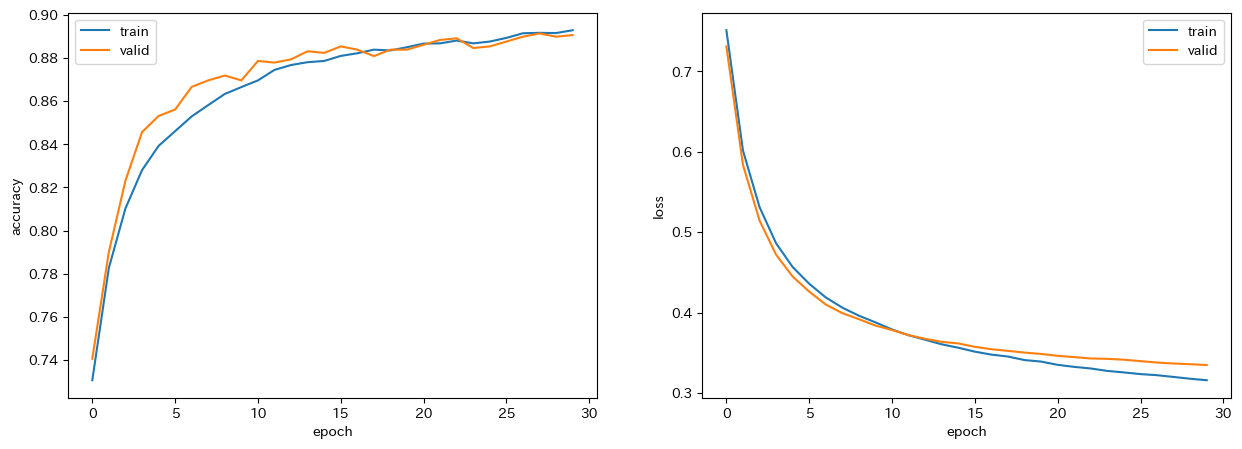

In [59]:
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(acc_loss_train).T[0], label='train')
ax[0].plot(np.array(acc_loss_valid).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend()
ax[1].plot(np.array(acc_loss_train).T[1], label='train')
ax[1].plot(np.array(acc_loss_valid).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend()
plt.show()

### 76.チェックポイント  
問題75のコードを改変し，各エポックのパラメータ更新が完了するたびに，チェックポイント（学習途中のパラメータ（重み行列など）の値や最適化アルゴリズムの内部状態）をファイルに書き出せ．

In [62]:
#ptファイルにセーブする
nn_model = NN(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.01)

NUM_EPOCHS = 30
acc_loss_train = []
acc_loss_valid = []
for epoch in range(NUM_EPOCHS):
    nn_model.train()
    for X, y in train_dataloader:
        optimizer.zero_grad()
        y_proba = nn_model(X)
        loss = criterion(y_proba, y)
        loss.backward()
        optimizer.step()
    
    loss_train, acc_train = acc_and_loss(nn_model, criterion, train_dataloader)
    loss_valid, acc_valid = acc_and_loss(nn_model, criterion, valid_dataloader)
    acc_loss_train.append([loss_train, acc_train])
    acc_loss_valid.append([loss_valid, acc_valid])
    
    torch.save({'epoch': epoch, 'model_state_dict': nn_model.state_dict(),\
                'optimizer_state_dict': optimizer.state_dict()},\
               f'./checkpoint/checkpoint{epoch + 1}.pt')
    print(f'epoch: {epoch+1}, loss_train: {loss_train}, acc_train: {acc_train},\
    loss_valid: {loss_valid}, acc_valid: {acc_valid}')

epoch: 1, loss_train: 0.6731372057608784, acc_train: 0.7512181409295352,    loss_valid: 0.6527791619300842, acc_valid: 0.7713643178410795
epoch: 2, loss_train: 0.5570513917713554, acc_train: 0.7960082458770614,    loss_valid: 0.5405511260032654, acc_valid: 0.8088455772113943
epoch: 3, loss_train: 0.5005978731249321, acc_train: 0.8183095952023988,    loss_valid: 0.48608866333961487, acc_valid: 0.8328335832083958
epoch: 4, loss_train: 0.4629505109246013, acc_train: 0.8349887556221889,    loss_valid: 0.4508402943611145, acc_valid: 0.8448275862068966
epoch: 5, loss_train: 0.43793197591743577, acc_train: 0.845952023988006,    loss_valid: 0.4282294809818268, acc_valid: 0.8575712143928036
epoch: 6, loss_train: 0.41977361082311426, acc_train: 0.8545727136431784,    loss_valid: 0.4122425615787506, acc_valid: 0.8628185907046477
epoch: 7, loss_train: 0.40518010467528837, acc_train: 0.8598200899550225,    loss_valid: 0.4003675580024719, acc_valid: 0.868815592203898
epoch: 8, loss_train: 0.39417084

### 77.ミニバッチ化  
問題76のコードを改変し，B
事例ごとに損失・勾配を計算し，行列W
の値を更新せよ（ミニバッチ化）．B
の値を1,2,4,8,…
と変化させながら，1エポックの学習に要する時間を比較せよ

In [75]:
#DataLoaderのbatch_sizeを変える必要があるので，そこからまとめて定義する
import time

def train_valid_model(train_dataset, valid_dataset, batch_size, nn_model, criterion, optimizer, num_epochs):
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    valid_dataloder = DataLoader(valid_dataset, batch_size=len(valid_dataset))
    
    loss_acc_train = []
    loss_acc_valid = []
    for epoch in range(num_epochs):
        train_start = time.time()
        
        nn_model.train()
        for X, y in train_dataloader:
            optimizer.zero_grad()
            y_proba = nn_model(X)
            loss = criterion(y_proba, y)
            loss.backward()
            optimizer.step()
            
        loss_train, acc_train = acc_and_loss(nn_model, criterion, train_dataloader)
        loss_valid, acc_valid = acc_and_loss(nn_model, criterion, valid_dataloader)
        loss_acc_train.append([loss_train, acc_train])
        loss_acc_valid.append([loss_valid, acc_valid])
        
        # torch.save({'epoch': epoch, 'model_state_dict': nn_model.state_dict(),\
        #             'optimizer_state_dict': optimizer.state_dict()},\
        #            f'./checkpoint/checkpoint{epoch+1}.pt')
        
        train_end = time.time()
        
        if epoch+1 == num_epochs:
            print(f'epoch: {epoch+1}, loss_train: {loss_train}, acc_train: {acc_train},\
            loss_valid: {loss_valid}, acc_valid: {acc_valid}, train_time: {train_end - train_start}sec')

In [76]:
train_dataset = MyDatasets(X_train, y_train)
valid_dataset = MyDatasets(X_valid, y_valid)
nn_model = NN(300, 4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(nn_model.parameters(), lr=0.1)
for batch_size in [2 ** i for i in range(13)]:
    print(f'バッチサイズ: {batch_size}')
    train_valid_model(train_dataset, valid_dataset, batch_size, nn_model, criterion, optimizer, 1)

バッチサイズ: 1
epoch: 1, loss_train: 0.3872192031081051, acc_train: 0.8652548725637181,            loss_valid: 0.3916949927806854, acc_valid: 0.863568215892054, train_time: 1.3336031436920166sec
バッチサイズ: 2
epoch: 1, loss_train: 0.35436927100081544, acc_train: 0.8765929535232384,            loss_valid: 0.36528146266937256, acc_valid: 0.876311844077961, train_time: 0.8508570194244385sec
バッチサイズ: 4
epoch: 1, loss_train: 0.34541528078623923, acc_train: 0.8784670164917541,            loss_valid: 0.358160138130188, acc_valid: 0.876311844077961, train_time: 0.48638105392456055sec
バッチサイズ: 8
epoch: 1, loss_train: 0.3380100801196145, acc_train: 0.8829647676161919,            loss_valid: 0.3512425422668457, acc_valid: 0.8793103448275862, train_time: 0.28769397735595703sec
バッチサイズ: 16
epoch: 1, loss_train: 0.33572789859389707, acc_train: 0.8835269865067467,            loss_valid: 0.3497042953968048, acc_valid: 0.8800599700149925, train_time: 0.18026494979858398sec
バッチサイズ: 32
epoch: 1, loss_train: 0.335450

### 78.GPU上での学習  
問題７７のコードを改変し，GPU上で学習を実行せよ．

### 79.MLP  
問題78のコードを改変し，バイアス項の導入や多層化など，ニューラルネットワークの形状を変更しながら，高性能なカテゴリ分類器を構築せよ．  
学習率のスケジューラーは[このページ](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)を参考にした

In [85]:
import torch
from torch import nn
from torch.nn import functional as F

class MLP(nn.Module):
    def __init__(self, input_size, middle_size, output_size, middle_layers):
        super().__init__()
        self.middle_layers = middle_layers
        self.bn_in = nn.BatchNorm1d(input_size)
        self.bn_mid = nn.BatchNorm1d(middle_size)
        self.l1 = nn.Linear(input_size, middle_size)
        self.l2 = nn.Linear(middle_size, middle_size)
        self.l3 = nn.Linear(middle_size, output_size)
        
    def forward(self, X):
        X = self.bn_in(X)
        X = F.relu(self.l1(X))
        X = self.bn_mid(X)
        X_0 = X.detach()
        for _ in range(self.middle_layers):
            X = F.relu(self.l2(X))
            X = self.bn_mid(X)
        X += X_0
        X = F.softmax(X, dim=1)
        return X

In [93]:
from tqdm import tqdm

def loss_and_acc(model, criterion, loader, device):
    model.eval()
    loss = 0.0
    total = 0
    correct = 0
    with torch.no_grad():
        for X, y in loader:
            X = X.to(device)
            y = y.to(device)
            y_proba = model(X)
            loss += criterion(y_proba, y).item()
            y_pred = torch.argmax(y_proba, dim=-1)
            total += len(X)
            correct += (y_pred == y).sum().item()
    return loss / len(loader), correct / total

def train_valid_model(train_dataset, valid_dataset, batch_size, model, criterion, optimizer, num_epochs):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=len(valid_dataset))
    
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
    
    loss_acc_train = []
    loss_acc_valid = []
    for epoch in tqdm(range(num_epochs)):
        train_start = time.time()
        model.train()
        for X, y in train_dataloader:
            optimizer.zero_grad()
            X = X.to(device)
            y = y.to(device)
            y_proba = model.forward(X)
            loss = criterion(y_proba, y)
            loss.backward()
            optimizer.step()
            
        loss_train, acc_train = loss_and_acc(model, criterion, train_dataloader, device)
        loss_valid, acc_valid = loss_and_acc(model, criterion, valid_dataloader, device)
        loss_acc_train.append([loss_train, acc_train])
        loss_acc_valid.append([loss_valid, acc_valid])
        
        torch.save({'epoch': epoch, 'model_state_dict': model.state_dict(),\
                    'optimizer_state_dict': optimizer.state_dict()},\
                   f'./checkpoint/checkpoint{epoch+1}')
        
        train_end = time.time()
        
        print(f'epoch: {epoch+1}, loss_train: {loss_train}, acc_train: {acc_train},\
        loss_valid: {loss_valid}, acc_valid: {acc_valid}, \
        train_time: {train_end-train_start}sec')
        
        scheduler.step(metrics=valid_loss)
        
    return {'train': loss_acc_train, 'valid': loss_acc_valid}

In [98]:
train_dataset = MyDatasets(X_train, y_train)
valid_dataset = MyDatasets(X_valid, y_valid)

model = MLP(300, 100, 4, 2)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)

log = train_valid_model(train_dataset, valid_dataset, 32, model, criterion, optimizer, 100)

  1%|▍                                          | 1/100 [00:00<01:15,  1.31it/s]

epoch: 1, loss_train: 4.313480647834572, acc_train: 0.4264264264264264,        loss_valid: 4.319212913513184, acc_valid: 0.4205397301349325,         train_time: 0.7608251571655273sec


  2%|▊                                          | 2/100 [00:01<01:08,  1.43it/s]

epoch: 2, loss_train: 3.9991847423461824, acc_train: 0.740990990990991,        loss_valid: 3.9956204891204834, acc_valid: 0.7421289355322339,         train_time: 0.6519579887390137sec


  3%|█▎                                         | 3/100 [00:01<01:02,  1.55it/s]

epoch: 3, loss_train: 3.9478602115814394, acc_train: 0.8205705705705706,        loss_valid: 3.954472780227661, acc_valid: 0.8125937031484258,         train_time: 0.5837581157684326sec


  4%|█▋                                         | 4/100 [00:02<01:00,  1.58it/s]

epoch: 4, loss_train: 3.903526652682651, acc_train: 0.8503190690690691,        loss_valid: 3.916038751602173, acc_valid: 0.8335832083958021,         train_time: 0.6171779632568359sec


  5%|██▏                                        | 5/100 [00:03<00:58,  1.62it/s]

epoch: 5, loss_train: 3.873653715437239, acc_train: 0.8738738738738738,        loss_valid: 3.878260612487793, acc_valid: 0.8620689655172413,         train_time: 0.5845961570739746sec


  6%|██▌                                        | 6/100 [00:03<01:03,  1.48it/s]

epoch: 6, loss_train: 3.8248729426581582, acc_train: 0.8909534534534534,        loss_valid: 3.8404386043548584, acc_valid: 0.8695652173913043,         train_time: 0.7885069847106934sec


  7%|███                                        | 7/100 [00:04<01:01,  1.52it/s]

epoch: 7, loss_train: 3.8046507405805157, acc_train: 0.893674924924925,        loss_valid: 3.8243870735168457, acc_valid: 0.8703148425787106,         train_time: 0.6225709915161133sec


  8%|███▍                                       | 8/100 [00:05<01:04,  1.42it/s]

epoch: 8, loss_train: 3.789774752951957, acc_train: 0.9023085585585585,        loss_valid: 3.814948081970215, acc_valid: 0.8778110944527736,         train_time: 0.8039422035217285sec


  9%|███▊                                       | 9/100 [00:06<01:01,  1.47it/s]

epoch: 9, loss_train: 3.7889541434096143, acc_train: 0.9071884384384384,        loss_valid: 3.814438819885254, acc_valid: 0.8793103448275862,         train_time: 0.6207082271575928sec


 10%|████▏                                     | 10/100 [00:06<01:04,  1.39it/s]

epoch: 10, loss_train: 3.77853300335171, acc_train: 0.9076576576576577,        loss_valid: 3.8001949787139893, acc_valid: 0.8823088455772113,         train_time: 0.8053920269012451sec


 11%|████▌                                     | 11/100 [00:07<01:03,  1.40it/s]

epoch: 11, loss_train: 3.766093246929638, acc_train: 0.9149774774774775,        loss_valid: 3.7943472862243652, acc_valid: 0.8808095952023988,         train_time: 0.697746992111206sec


 12%|█████                                     | 12/100 [00:08<00:59,  1.47it/s]

epoch: 12, loss_train: 3.7525423489533387, acc_train: 0.9150713213213213,        loss_valid: 3.7761380672454834, acc_valid: 0.889055472263868,         train_time: 0.6031131744384766sec


 13%|█████▍                                    | 13/100 [00:08<01:03,  1.38it/s]

epoch: 13, loss_train: 3.749940880068072, acc_train: 0.9213588588588588,        loss_valid: 3.7766408920288086, acc_valid: 0.8928035982008995,         train_time: 0.8311119079589844sec


 14%|█████▉                                    | 14/100 [00:09<01:02,  1.38it/s]

epoch: 14, loss_train: 3.757388966935533, acc_train: 0.9214527027027027,        loss_valid: 3.7829957008361816, acc_valid: 0.8928035982008995,         train_time: 0.7230000495910645sec


 15%|██████▎                                   | 15/100 [00:10<01:04,  1.33it/s]

epoch: 15, loss_train: 3.759555564628349, acc_train: 0.9209834834834835,        loss_valid: 3.7842752933502197, acc_valid: 0.8928035982008995,         train_time: 0.8195719718933105sec


 16%|██████▋                                   | 16/100 [00:11<01:00,  1.39it/s]

epoch: 16, loss_train: 3.754098902235518, acc_train: 0.9239864864864865,        loss_valid: 3.7806336879730225, acc_valid: 0.8935532233883059,         train_time: 0.6360669136047363sec


 17%|███████▏                                  | 17/100 [00:11<00:57,  1.45it/s]

epoch: 17, loss_train: 3.758924382584947, acc_train: 0.921265015015015,        loss_valid: 3.7847185134887695, acc_valid: 0.8905547226386806,         train_time: 0.6251709461212158sec


 18%|███████▌                                  | 18/100 [00:12<00:59,  1.38it/s]

epoch: 18, loss_train: 3.755539738738143, acc_train: 0.9229542042042042,        loss_valid: 3.7837023735046387, acc_valid: 0.8883058470764618,         train_time: 0.8022868633270264sec


 19%|███████▉                                  | 19/100 [00:13<00:57,  1.40it/s]

epoch: 19, loss_train: 3.760844413940613, acc_train: 0.9226726726726727,        loss_valid: 3.7910923957824707, acc_valid: 0.8868065967016492,         train_time: 0.6826190948486328sec


 20%|████████▍                                 | 20/100 [00:13<00:54,  1.46it/s]

epoch: 20, loss_train: 3.76531520333734, acc_train: 0.9202327327327328,        loss_valid: 3.7933099269866943, acc_valid: 0.889055472263868,         train_time: 0.6193108558654785sec


 21%|████████▊                                 | 21/100 [00:14<00:55,  1.42it/s]

epoch: 21, loss_train: 3.7542354731230407, acc_train: 0.9283971471471472,        loss_valid: 3.7852678298950195, acc_valid: 0.8928035982008995,         train_time: 0.7569079399108887sec


 22%|█████████▏                                | 22/100 [00:15<00:57,  1.36it/s]

epoch: 22, loss_train: 3.7576716476016574, acc_train: 0.9259572072072072,        loss_valid: 3.7865443229675293, acc_valid: 0.8950524737631185,         train_time: 0.7964651584625244sec


 23%|█████████▋                                | 23/100 [00:16<00:53,  1.43it/s]

epoch: 23, loss_train: 3.7673580395924793, acc_train: 0.924831081081081,        loss_valid: 3.79630184173584, acc_valid: 0.8913043478260869,         train_time: 0.6226608753204346sec


 24%|██████████                                | 24/100 [00:16<00:51,  1.47it/s]

epoch: 24, loss_train: 3.7682780675343923, acc_train: 0.9282094594594594,        loss_valid: 3.79823637008667, acc_valid: 0.8935532233883059,         train_time: 0.636782169342041sec


 25%|██████████▌                               | 25/100 [00:17<00:51,  1.46it/s]

epoch: 25, loss_train: 3.7712377728642643, acc_train: 0.9226726726726727,        loss_valid: 3.797947883605957, acc_valid: 0.8898050974512743,         train_time: 0.6868946552276611sec


 26%|██████████▉                               | 26/100 [00:18<00:53,  1.37it/s]

epoch: 26, loss_train: 3.7716019196553274, acc_train: 0.9235172672672672,        loss_valid: 3.7989654541015625, acc_valid: 0.8898050974512743,         train_time: 0.8323142528533936sec


 27%|███████████▎                              | 27/100 [00:19<00:55,  1.33it/s]

epoch: 27, loss_train: 3.7687392556989514, acc_train: 0.9296171171171171,        loss_valid: 3.8028671741485596, acc_valid: 0.8883058470764618,         train_time: 0.8148248195648193sec


 28%|███████████▊                              | 28/100 [00:19<00:53,  1.34it/s]

epoch: 28, loss_train: 3.7593846070515857, acc_train: 0.9296171171171171,        loss_valid: 3.790492534637451, acc_valid: 0.8958020989505248,         train_time: 0.7223331928253174sec


 29%|████████████▏                             | 29/100 [00:20<00:48,  1.45it/s]

epoch: 29, loss_train: 3.7740415051892713, acc_train: 0.9218280780780781,        loss_valid: 3.802941083908081, acc_valid: 0.8905547226386806,         train_time: 0.5616750717163086sec


 30%|████████████▌                             | 30/100 [00:21<00:48,  1.44it/s]

epoch: 30, loss_train: 3.76651648859362, acc_train: 0.9281156156156156,        loss_valid: 3.798712730407715, acc_valid: 0.8920539730134932,         train_time: 0.7025032043457031sec


 31%|█████████████                             | 31/100 [00:21<00:47,  1.44it/s]

epoch: 31, loss_train: 3.7795089966542013, acc_train: 0.9230480480480481,        loss_valid: 3.808670997619629, acc_valid: 0.8920539730134932,         train_time: 0.6947171688079834sec


 32%|█████████████▍                            | 32/100 [00:22<00:47,  1.44it/s]

epoch: 32, loss_train: 3.754415389653799, acc_train: 0.929710960960961,        loss_valid: 3.7861006259918213, acc_valid: 0.8913043478260869,         train_time: 0.7016608715057373sec


 33%|█████████████▊                            | 33/100 [00:23<00:46,  1.44it/s]

epoch: 33, loss_train: 3.7802037598492504, acc_train: 0.9132882882882883,        loss_valid: 3.8027117252349854, acc_valid: 0.8845577211394303,         train_time: 0.6840879917144775sec


 34%|██████████████▎                           | 34/100 [00:23<00:48,  1.37it/s]

epoch: 34, loss_train: 3.776996501573213, acc_train: 0.9245495495495496,        loss_valid: 3.805203676223755, acc_valid: 0.8898050974512743,         train_time: 0.8171100616455078sec


 35%|██████████████▋                           | 35/100 [00:24<00:47,  1.37it/s]

epoch: 35, loss_train: 3.76201060369566, acc_train: 0.9243618618618619,        loss_valid: 3.7913501262664795, acc_valid: 0.8905547226386806,         train_time: 0.7282288074493408sec


 36%|███████████████                           | 36/100 [00:25<00:47,  1.34it/s]

epoch: 36, loss_train: 3.7636242170591614, acc_train: 0.925487987987988,        loss_valid: 3.7916762828826904, acc_valid: 0.8928035982008995,         train_time: 0.781813383102417sec


 37%|███████████████▌                          | 37/100 [00:26<00:44,  1.40it/s]

epoch: 37, loss_train: 3.7672440783755556, acc_train: 0.924924924924925,        loss_valid: 3.7975826263427734, acc_valid: 0.8935532233883059,         train_time: 0.6400189399719238sec


 38%|███████████████▉                          | 38/100 [00:26<00:43,  1.42it/s]

epoch: 38, loss_train: 3.758029412936878, acc_train: 0.9301801801801802,        loss_valid: 3.7906038761138916, acc_valid: 0.889055472263868,         train_time: 0.6748149394989014sec


 39%|████████████████▍                         | 39/100 [00:27<00:42,  1.45it/s]

epoch: 39, loss_train: 3.771054955932113, acc_train: 0.9219219219219219,        loss_valid: 3.7980525493621826, acc_valid: 0.889055472263868,         train_time: 0.6589357852935791sec


 40%|████████████████▊                         | 40/100 [00:28<00:40,  1.48it/s]

epoch: 40, loss_train: 3.7606781867889314, acc_train: 0.9276463963963963,        loss_valid: 3.791754961013794, acc_valid: 0.8928035982008995,         train_time: 0.6448712348937988sec


 41%|█████████████████▏                        | 41/100 [00:28<00:40,  1.46it/s]

epoch: 41, loss_train: 3.767152178394902, acc_train: 0.9278340840840841,        loss_valid: 3.7970473766326904, acc_valid: 0.8913043478260869,         train_time: 0.6972498893737793sec


 42%|█████████████████▋                        | 42/100 [00:29<00:39,  1.49it/s]

epoch: 42, loss_train: 3.7784715321686893, acc_train: 0.9238926426426426,        loss_valid: 3.8078246116638184, acc_valid: 0.8913043478260869,         train_time: 0.6496241092681885sec


 43%|██████████████████                        | 43/100 [00:30<00:40,  1.41it/s]

epoch: 43, loss_train: 3.754381394601083, acc_train: 0.9283033033033034,        loss_valid: 3.7870943546295166, acc_valid: 0.8905547226386806,         train_time: 0.7942428588867188sec


 44%|██████████████████▍                       | 44/100 [00:30<00:38,  1.45it/s]

epoch: 44, loss_train: 3.761153959297203, acc_train: 0.9239864864864865,        loss_valid: 3.790499210357666, acc_valid: 0.8950524737631185,         train_time: 0.6358749866485596sec


 45%|██████████████████▉                       | 45/100 [00:31<00:39,  1.41it/s]

epoch: 45, loss_train: 3.7664373572524243, acc_train: 0.9253941441441441,        loss_valid: 3.7988479137420654, acc_valid: 0.8875562218890555,         train_time: 0.7607500553131104sec


 46%|███████████████████▎                      | 46/100 [00:32<00:40,  1.34it/s]

epoch: 46, loss_train: 3.770919166885697, acc_train: 0.9241741741741741,        loss_valid: 3.8019912242889404, acc_valid: 0.8920539730134932,         train_time: 0.8258700370788574sec


 47%|███████████████████▋                      | 47/100 [00:33<00:40,  1.30it/s]

epoch: 47, loss_train: 3.768743610238886, acc_train: 0.9229542042042042,        loss_valid: 3.797461748123169, acc_valid: 0.8905547226386806,         train_time: 0.833118200302124sec


 48%|████████████████████▏                     | 48/100 [00:34<00:40,  1.28it/s]

epoch: 48, loss_train: 3.764663232339395, acc_train: 0.9273648648648649,        loss_valid: 3.7954182624816895, acc_valid: 0.8905547226386806,         train_time: 0.8133540153503418sec


 49%|████████████████████▌                     | 49/100 [00:34<00:39,  1.28it/s]

epoch: 49, loss_train: 3.7719665948335117, acc_train: 0.9198573573573574,        loss_valid: 3.7975423336029053, acc_valid: 0.8868065967016492,         train_time: 0.7819108963012695sec


 50%|█████████████████████                     | 50/100 [00:35<00:39,  1.25it/s]

epoch: 50, loss_train: 3.7690027289920383, acc_train: 0.9247372372372372,        loss_valid: 3.799229621887207, acc_valid: 0.8898050974512743,         train_time: 0.8318459987640381sec


 51%|█████████████████████▍                    | 51/100 [00:36<00:38,  1.27it/s]

epoch: 51, loss_train: 3.7626636794379524, acc_train: 0.9269894894894894,        loss_valid: 3.7926924228668213, acc_valid: 0.8913043478260869,         train_time: 0.7615790367126465sec


 52%|█████████████████████▊                    | 52/100 [00:37<00:34,  1.38it/s]

epoch: 52, loss_train: 3.7640671951992735, acc_train: 0.9215465465465466,        loss_valid: 3.790248155593872, acc_valid: 0.8905547226386806,         train_time: 0.5802879333496094sec


 53%|██████████████████████▎                   | 53/100 [00:37<00:34,  1.38it/s]

epoch: 53, loss_train: 3.771728504169453, acc_train: 0.9239864864864865,        loss_valid: 3.8012146949768066, acc_valid: 0.8905547226386806,         train_time: 0.718425989151001sec


 54%|██████████████████████▋                   | 54/100 [00:38<00:34,  1.33it/s]

epoch: 54, loss_train: 3.7687133590022364, acc_train: 0.9256756756756757,        loss_valid: 3.7987172603607178, acc_valid: 0.8913043478260869,         train_time: 0.8090610504150391sec


 55%|███████████████████████                   | 55/100 [00:39<00:34,  1.29it/s]

epoch: 55, loss_train: 3.7518740387650222, acc_train: 0.9313063063063063,        loss_valid: 3.7849271297454834, acc_valid: 0.8943028485757122,         train_time: 0.831273078918457sec


 56%|███████████████████████▌                  | 56/100 [00:40<00:33,  1.31it/s]

epoch: 56, loss_train: 3.7731165341786794, acc_train: 0.9229542042042042,        loss_valid: 3.8022866249084473, acc_valid: 0.8928035982008995,         train_time: 0.7298710346221924sec


 57%|███████████████████████▉                  | 57/100 [00:40<00:32,  1.32it/s]

epoch: 57, loss_train: 3.7875635538015278, acc_train: 0.9169481981981982,        loss_valid: 3.8130006790161133, acc_valid: 0.8883058470764618,         train_time: 0.7404792308807373sec


 58%|████████████████████████▎                 | 58/100 [00:41<00:30,  1.39it/s]

epoch: 58, loss_train: 3.7783792090487553, acc_train: 0.9210773273273273,        loss_valid: 3.8068089485168457, acc_valid: 0.8898050974512743,         train_time: 0.6378629207611084sec


 59%|████████████████████████▊                 | 59/100 [00:42<00:29,  1.40it/s]

epoch: 59, loss_train: 3.7664657569862343, acc_train: 0.9244557057057057,        loss_valid: 3.79729962348938, acc_valid: 0.8913043478260869,         train_time: 0.7016949653625488sec


 60%|█████████████████████████▏                | 60/100 [00:42<00:27,  1.46it/s]

epoch: 60, loss_train: 3.7682583396499223, acc_train: 0.9233295795795796,        loss_valid: 3.7956206798553467, acc_valid: 0.889055472263868,         train_time: 0.6143050193786621sec


 61%|█████████████████████████▌                | 61/100 [00:43<00:26,  1.49it/s]

epoch: 61, loss_train: 3.752561052282293, acc_train: 0.9292417417417418,        loss_valid: 3.7845757007598877, acc_valid: 0.8935532233883059,         train_time: 0.6404039859771729sec


 62%|██████████████████████████                | 62/100 [00:44<00:24,  1.54it/s]

epoch: 62, loss_train: 3.763853632294022, acc_train: 0.9268018018018018,        loss_valid: 3.7967445850372314, acc_valid: 0.889055472263868,         train_time: 0.5959899425506592sec


 63%|██████████████████████████▍               | 63/100 [00:44<00:25,  1.44it/s]

epoch: 63, loss_train: 3.778035005649647, acc_train: 0.9201388888888888,        loss_valid: 3.805786371231079, acc_valid: 0.8883058470764618,         train_time: 0.8070001602172852sec


 64%|██████████████████████████▉               | 64/100 [00:45<00:26,  1.38it/s]

epoch: 64, loss_train: 3.7547533884420767, acc_train: 0.9296171171171171,        loss_valid: 3.7861175537109375, acc_valid: 0.8943028485757122,         train_time: 0.7948520183563232sec


 65%|███████████████████████████▎              | 65/100 [00:46<00:24,  1.42it/s]

epoch: 65, loss_train: 3.763948457735079, acc_train: 0.9236111111111112,        loss_valid: 3.790785312652588, acc_valid: 0.8920539730134932,         train_time: 0.6499667167663574sec


 66%|███████████████████████████▋              | 66/100 [00:46<00:22,  1.49it/s]

epoch: 66, loss_train: 3.765377286676172, acc_train: 0.9257695195195195,        loss_valid: 3.794835090637207, acc_valid: 0.8920539730134932,         train_time: 0.5877916812896729sec


 67%|████████████████████████████▏             | 67/100 [00:47<00:22,  1.49it/s]

epoch: 67, loss_train: 3.7580899963149794, acc_train: 0.9304617117117117,        loss_valid: 3.7923784255981445, acc_valid: 0.8928035982008995,         train_time: 0.6792888641357422sec


 68%|████████████████████████████▌             | 68/100 [00:48<00:20,  1.57it/s]

epoch: 68, loss_train: 3.7727395020447694, acc_train: 0.9287725225225225,        loss_valid: 3.8065497875213623, acc_valid: 0.8868065967016492,         train_time: 0.5547690391540527sec


 69%|████████████████████████████▉             | 69/100 [00:48<00:19,  1.57it/s]

epoch: 69, loss_train: 3.76034208031388, acc_train: 0.9268018018018018,        loss_valid: 3.7903616428375244, acc_valid: 0.8905547226386806,         train_time: 0.6350688934326172sec


 70%|█████████████████████████████▍            | 70/100 [00:49<00:19,  1.51it/s]

epoch: 70, loss_train: 3.76147156363135, acc_train: 0.9264264264264265,        loss_valid: 3.7913057804107666, acc_valid: 0.8935532233883059,         train_time: 0.7204868793487549sec


 71%|█████████████████████████████▊            | 71/100 [00:50<00:19,  1.52it/s]

epoch: 71, loss_train: 3.779723242596463, acc_train: 0.9218280780780781,        loss_valid: 3.8065106868743896, acc_valid: 0.8898050974512743,         train_time: 0.6525630950927734sec


 72%|██████████████████████████████▏           | 72/100 [00:50<00:19,  1.45it/s]

epoch: 72, loss_train: 3.7641349798208243, acc_train: 0.9241741741741741,        loss_valid: 3.79097318649292, acc_valid: 0.8928035982008995,         train_time: 0.7651488780975342sec


 73%|██████████████████████████████▋           | 73/100 [00:51<00:18,  1.46it/s]

epoch: 73, loss_train: 3.772983266784622, acc_train: 0.9273648648648649,        loss_valid: 3.8037521839141846, acc_valid: 0.8935532233883059,         train_time: 0.664567232131958sec


 74%|███████████████████████████████           | 74/100 [00:52<00:17,  1.52it/s]

epoch: 74, loss_train: 3.7694549317116492, acc_train: 0.9245495495495496,        loss_valid: 3.7980763912200928, acc_valid: 0.889055472263868,         train_time: 0.5920028686523438sec


 75%|███████████████████████████████▌          | 75/100 [00:52<00:16,  1.53it/s]

epoch: 75, loss_train: 3.7631761068338387, acc_train: 0.9243618618618619,        loss_valid: 3.791799306869507, acc_valid: 0.8913043478260869,         train_time: 0.6483240127563477sec


 76%|███████████████████████████████▉          | 76/100 [00:53<00:15,  1.50it/s]

epoch: 76, loss_train: 3.766434253515066, acc_train: 0.9222034534534534,        loss_valid: 3.794538736343384, acc_valid: 0.8868065967016492,         train_time: 0.6926469802856445sec


 77%|████████████████████████████████▎         | 77/100 [00:54<00:15,  1.52it/s]

epoch: 77, loss_train: 3.7685694372331775, acc_train: 0.9267079579579579,        loss_valid: 3.7986316680908203, acc_valid: 0.8928035982008995,         train_time: 0.6361322402954102sec


 78%|████████████████████████████████▊         | 78/100 [00:54<00:14,  1.51it/s]

epoch: 78, loss_train: 3.76072139138574, acc_train: 0.9269894894894894,        loss_valid: 3.789863348007202, acc_valid: 0.8928035982008995,         train_time: 0.6794571876525879sec


 79%|█████████████████████████████████▏        | 79/100 [00:55<00:14,  1.47it/s]

epoch: 79, loss_train: 3.771531659203607, acc_train: 0.9229542042042042,        loss_valid: 3.8009090423583984, acc_valid: 0.8905547226386806,         train_time: 0.7238609790802002sec


 80%|█████████████████████████████████▌        | 80/100 [00:56<00:13,  1.47it/s]

epoch: 80, loss_train: 3.769843792414164, acc_train: 0.9261448948948949,        loss_valid: 3.801058769226074, acc_valid: 0.889055472263868,         train_time: 0.6712141036987305sec


 81%|██████████████████████████████████        | 81/100 [00:56<00:12,  1.49it/s]

epoch: 81, loss_train: 3.768642308117749, acc_train: 0.9264264264264265,        loss_valid: 3.8008005619049072, acc_valid: 0.8905547226386806,         train_time: 0.6510109901428223sec


 82%|██████████████████████████████████▍       | 82/100 [00:57<00:11,  1.53it/s]

epoch: 82, loss_train: 3.7645040739763966, acc_train: 0.9259572072072072,        loss_valid: 3.792508363723755, acc_valid: 0.8943028485757122,         train_time: 0.6152501106262207sec


 83%|██████████████████████████████████▊       | 83/100 [00:58<00:11,  1.52it/s]

epoch: 83, loss_train: 3.773550488211371, acc_train: 0.9192942942942943,        loss_valid: 3.8025333881378174, acc_valid: 0.8868065967016492,         train_time: 0.6631689071655273sec


 84%|███████████████████████████████████▎      | 84/100 [00:58<00:10,  1.51it/s]

epoch: 84, loss_train: 3.7624779062586144, acc_train: 0.9244557057057057,        loss_valid: 3.790876865386963, acc_valid: 0.8913043478260869,         train_time: 0.6709640026092529sec


 85%|███████████████████████████████████▋      | 85/100 [00:59<00:09,  1.58it/s]

epoch: 85, loss_train: 3.7664581576625147, acc_train: 0.9235172672672672,        loss_valid: 3.794285774230957, acc_valid: 0.889055472263868,         train_time: 0.5616440773010254sec


 86%|████████████████████████████████████      | 86/100 [01:00<00:08,  1.58it/s]

epoch: 86, loss_train: 3.768856703698098, acc_train: 0.9268956456456456,        loss_valid: 3.8014936447143555, acc_valid: 0.8875562218890555,         train_time: 0.6315009593963623sec


 87%|████████████████████████████████████▌     | 87/100 [01:00<00:08,  1.53it/s]

epoch: 87, loss_train: 3.774958039189244, acc_train: 0.9220157657657657,        loss_valid: 3.8036892414093018, acc_valid: 0.8898050974512743,         train_time: 0.7051501274108887sec


 88%|████████████████████████████████████▉     | 88/100 [01:01<00:07,  1.56it/s]

epoch: 88, loss_train: 3.75690671703121, acc_train: 0.9283971471471472,        loss_valid: 3.7884395122528076, acc_valid: 0.8935532233883059,         train_time: 0.6130101680755615sec


 89%|█████████████████████████████████████▍    | 89/100 [01:01<00:06,  1.57it/s]

epoch: 89, loss_train: 3.7720273836954936, acc_train: 0.9223911411411412,        loss_valid: 3.8028650283813477, acc_valid: 0.8913043478260869,         train_time: 0.6211538314819336sec


 90%|█████████████████████████████████████▊    | 90/100 [01:02<00:06,  1.58it/s]

epoch: 90, loss_train: 3.768699318797023, acc_train: 0.927271021021021,        loss_valid: 3.7992899417877197, acc_valid: 0.8913043478260869,         train_time: 0.6266591548919678sec


 91%|██████████████████████████████████████▏   | 91/100 [01:03<00:05,  1.57it/s]

epoch: 91, loss_train: 3.7595774447237766, acc_train: 0.9252064564564565,        loss_valid: 3.788652181625366, acc_valid: 0.8928035982008995,         train_time: 0.6405770778656006sec


 92%|██████████████████████████████████████▋   | 92/100 [01:03<00:05,  1.58it/s]

epoch: 92, loss_train: 3.7755657975022143, acc_train: 0.9264264264264265,        loss_valid: 3.805543899536133, acc_valid: 0.8928035982008995,         train_time: 0.629378080368042sec


 93%|███████████████████████████████████████   | 93/100 [01:04<00:04,  1.58it/s]

epoch: 93, loss_train: 3.7713412744504913, acc_train: 0.9232357357357357,        loss_valid: 3.798916816711426, acc_valid: 0.889055472263868,         train_time: 0.6324033737182617sec


 94%|███████████████████████████████████████▍  | 94/100 [01:05<00:03,  1.56it/s]

epoch: 94, loss_train: 3.7634533060205593, acc_train: 0.924831081081081,        loss_valid: 3.7921242713928223, acc_valid: 0.8935532233883059,         train_time: 0.6568782329559326sec


 95%|███████████████████████████████████████▉  | 95/100 [01:05<00:03,  1.45it/s]

epoch: 95, loss_train: 3.7674793867735534, acc_train: 0.9251126126126126,        loss_valid: 3.7957589626312256, acc_valid: 0.8898050974512743,         train_time: 0.8062012195587158sec


 96%|████████████████████████████████████████▎ | 96/100 [01:06<00:02,  1.36it/s]

epoch: 96, loss_train: 3.7562107531516045, acc_train: 0.9292417417417418,        loss_valid: 3.787677049636841, acc_valid: 0.8943028485757122,         train_time: 0.8457889556884766sec


 97%|████████████████████████████████████████▋ | 97/100 [01:07<00:02,  1.29it/s]

epoch: 97, loss_train: 3.762169974702257, acc_train: 0.9257695195195195,        loss_valid: 3.792081594467163, acc_valid: 0.8920539730134932,         train_time: 0.8620119094848633sec


 98%|█████████████████████████████████████████▏| 98/100 [01:08<00:01,  1.29it/s]

epoch: 98, loss_train: 3.7587588714049742, acc_train: 0.9283971471471472,        loss_valid: 3.78944730758667, acc_valid: 0.8935532233883059,         train_time: 0.7681031227111816sec


 99%|█████████████████████████████████████████▌| 99/100 [01:09<00:00,  1.34it/s]

epoch: 99, loss_train: 3.7710426276152558, acc_train: 0.9253003003003003,        loss_valid: 3.8011314868927, acc_valid: 0.8905547226386806,         train_time: 0.6912178993225098sec


100%|█████████████████████████████████████████| 100/100 [01:09<00:00,  1.43it/s]

epoch: 100, loss_train: 3.760739943644664, acc_train: 0.9258633633633634,        loss_valid: 3.789804697036743, acc_valid: 0.8950524737631185,         train_time: 0.655689001083374sec


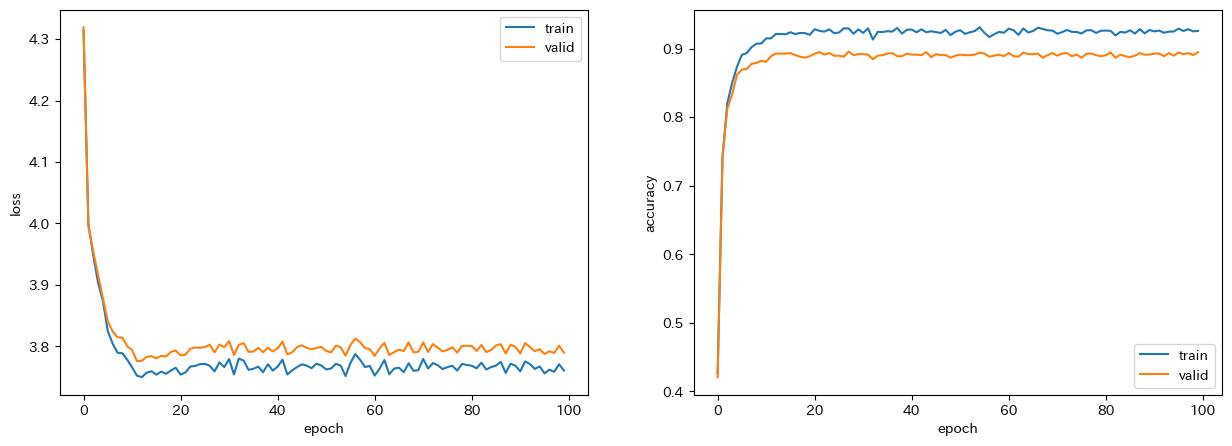

In [99]:
figure, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(np.array(log['train']).T[0], label='train')
ax[0].plot(np.array(log['valid']).T[0], label='valid')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(np.array(log['train']).T[1], label='train')
ax[1].plot(np.array(log['valid']).T[1], label='valid')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
plt.show()

In [100]:
def acc_test(model, loader):
    model.eval()
    total = 0
    corret = 0
    with torch.no_grad():
        for X, y in loader:
            y_proba = model(X)
            y_pred = torch.argmax(y_proba, dim=-1)
            total += len(X)
            correct = (y_pred == y).sum().item()
    return correct / total

In [101]:
test_dataset = MyDatasets(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
acc_test(model, test_loader)

0.883808095952024